In [1]:
import sys
sys.path.insert(1, '../../eispy2d/library/')
import benchmark as bmk
import result as rst
benchmark = bmk.Benchmark(import_filename="average.bmk",
                          import_filepath="../../data/shape/average/")
print(benchmark)

Name: average.bmk
Method: lsm, osm, bim, csi, som
Discretization: Richmond Method (40x40)
Results: done



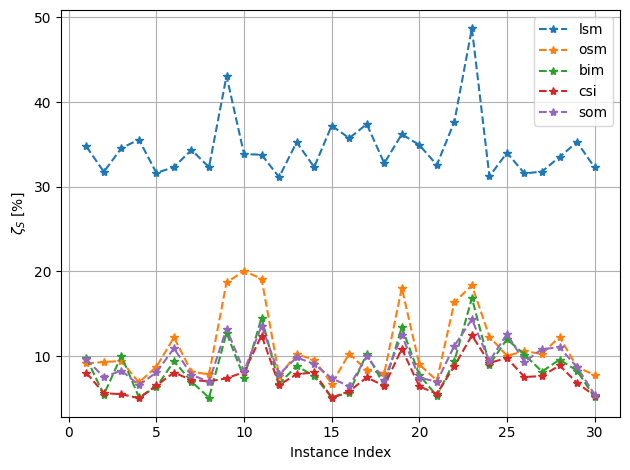

In [2]:
benchmark.plot("zeta_s", show=True)

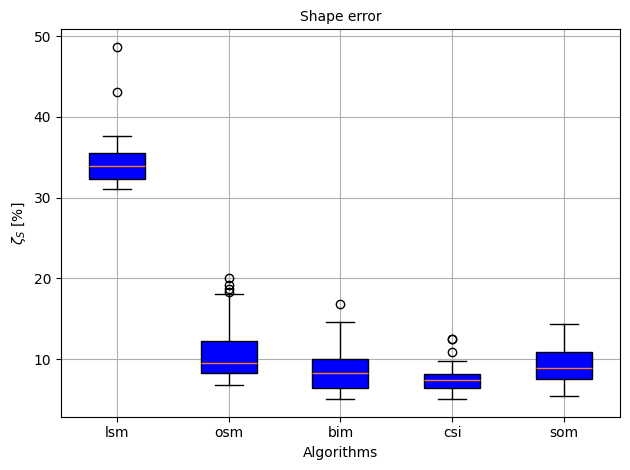

In [3]:
benchmark.boxplot("zeta_s", show=True)

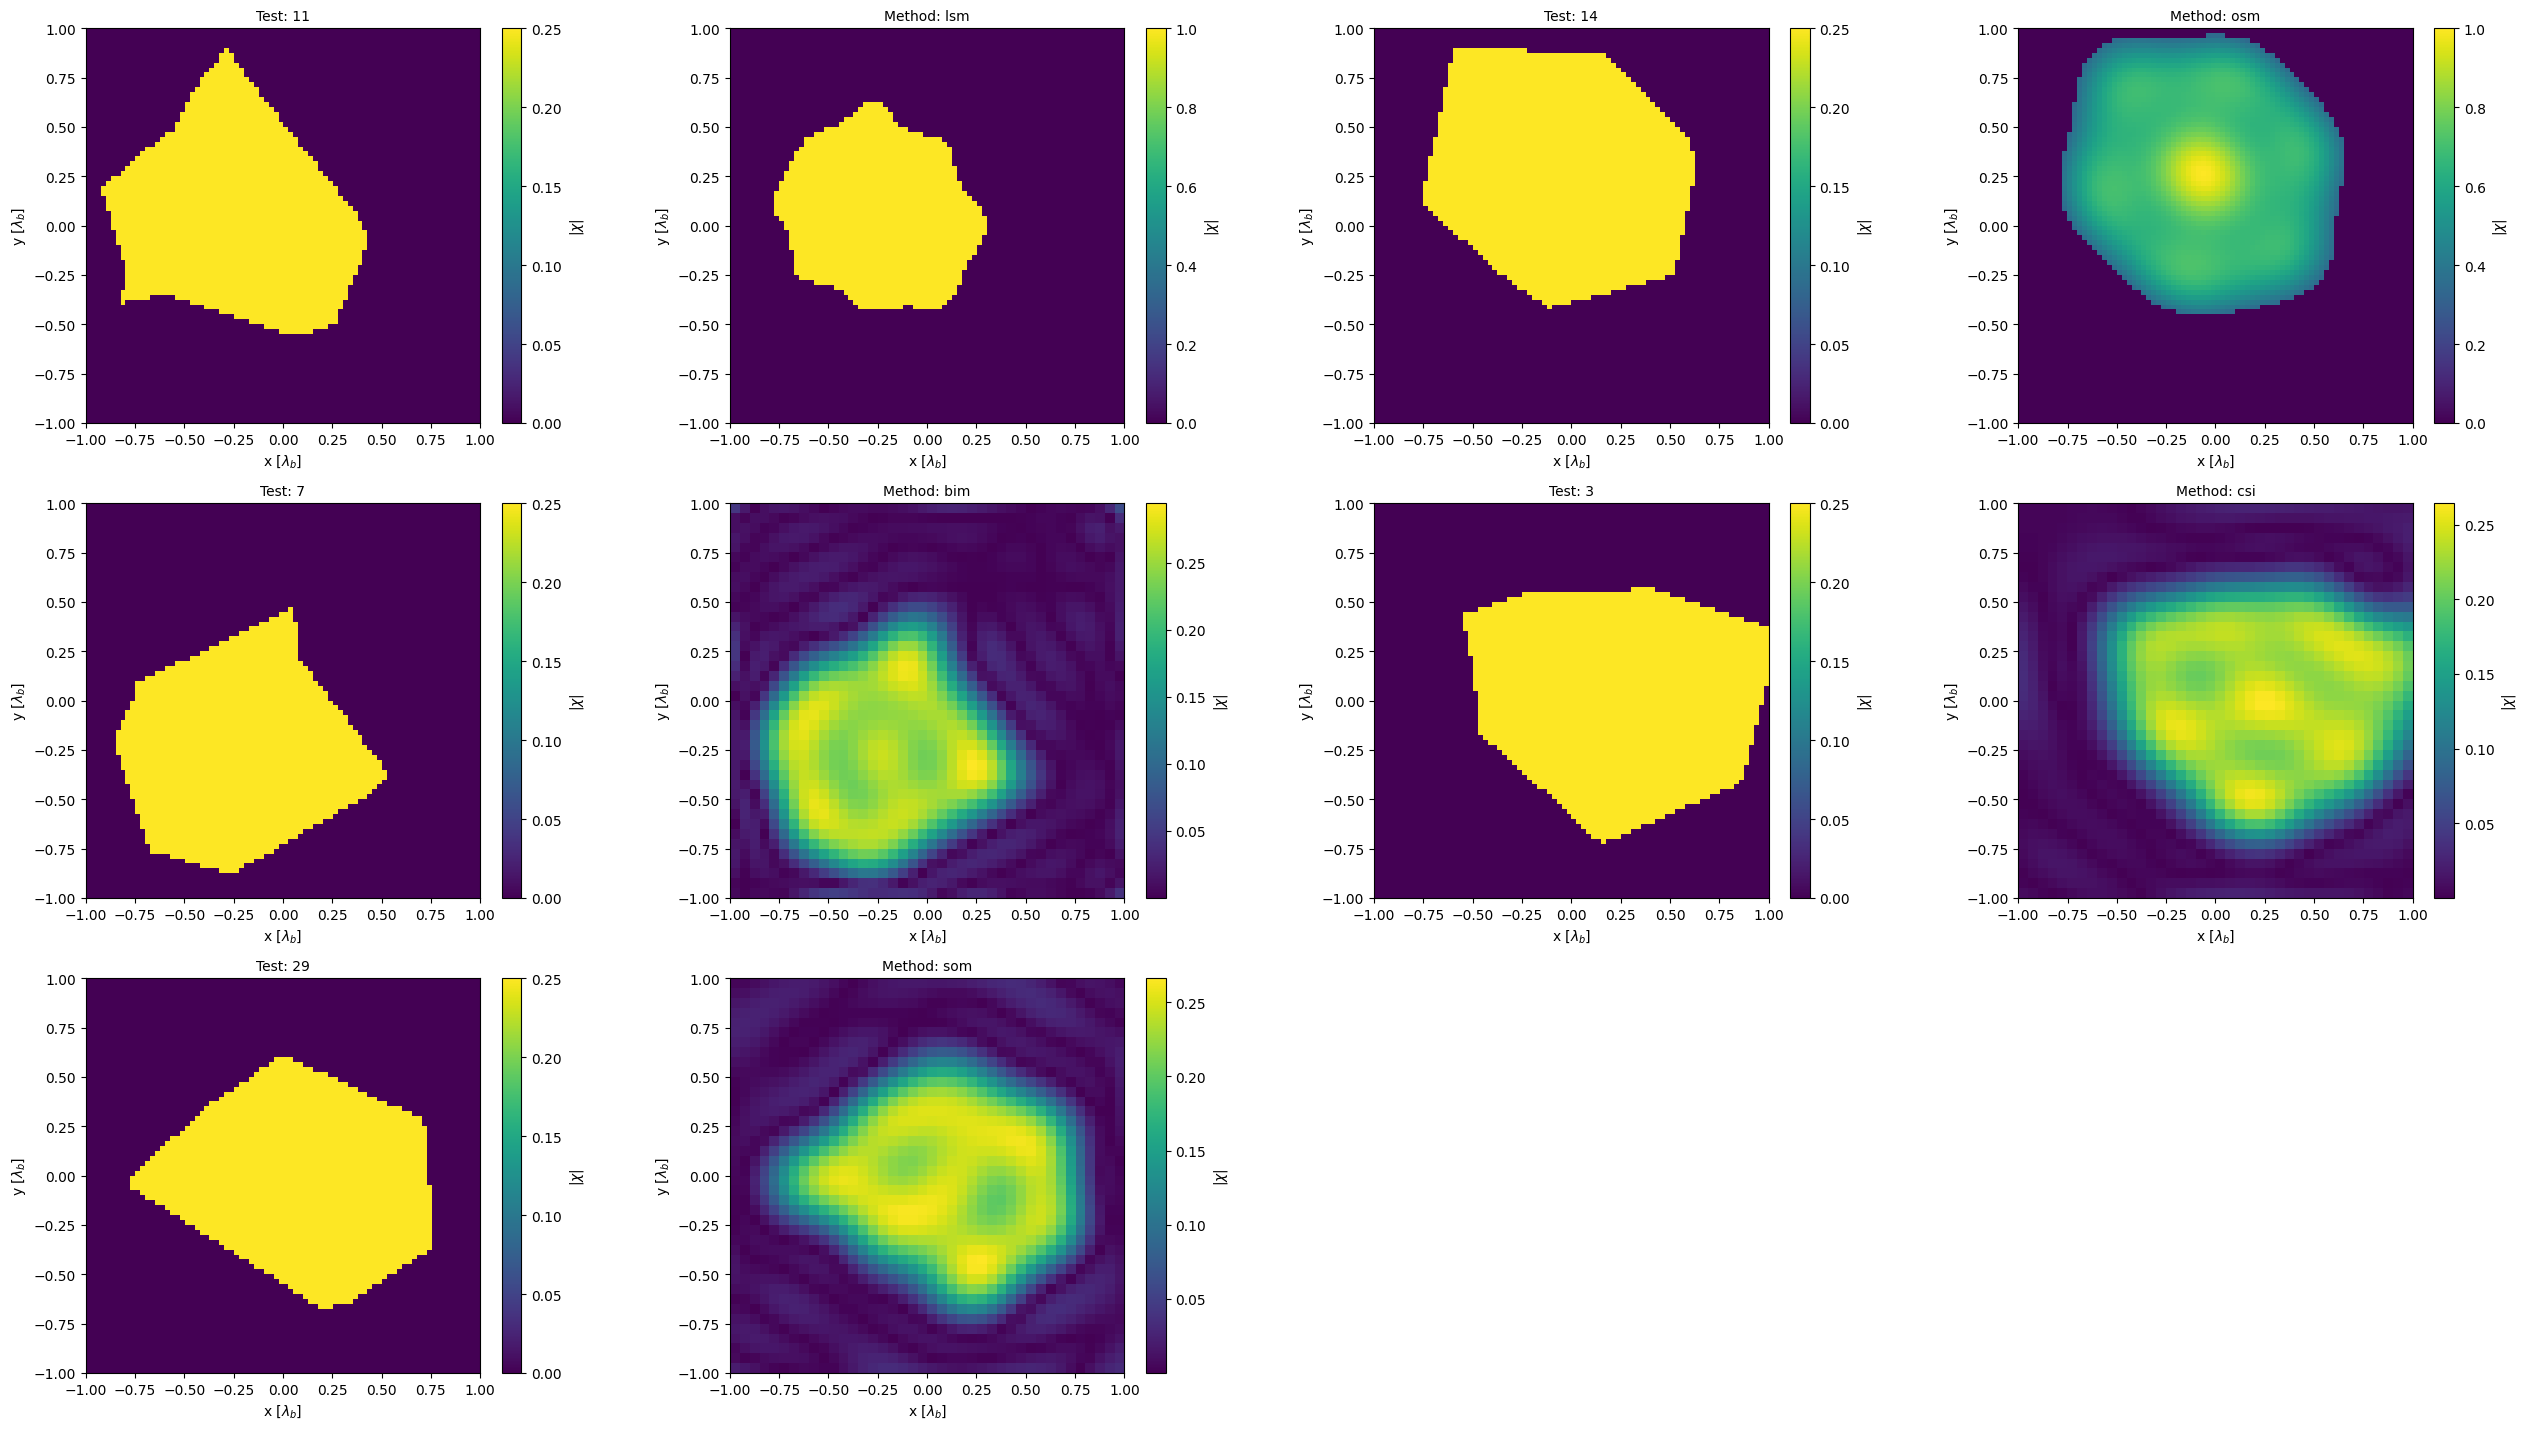

In [4]:
benchmark.reconstruction(indicator="zeta_s", show=True, mode=bmk.BEST_TEST)

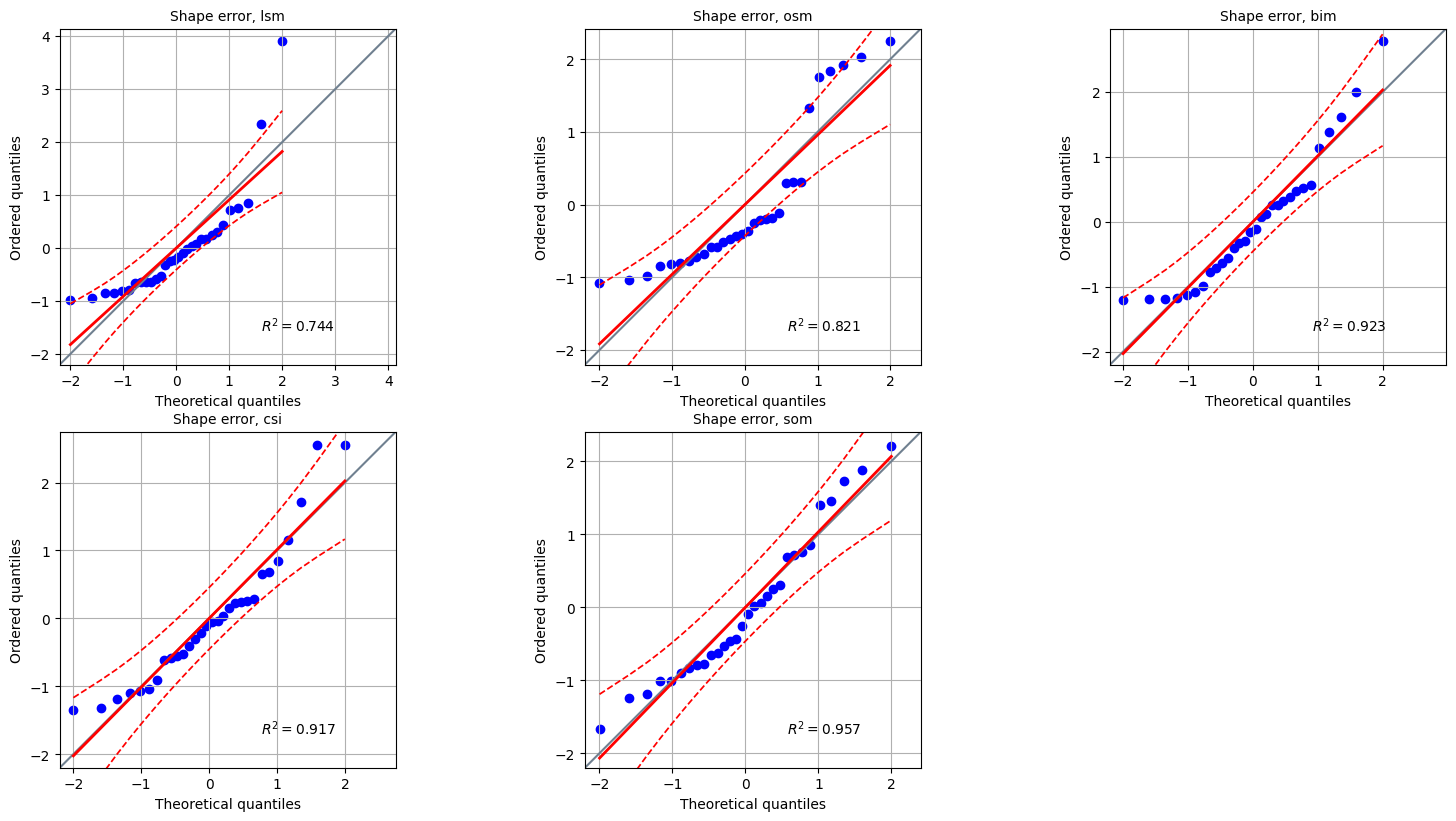

In [5]:
benchmark.normality("zeta_s", show=True)

In [6]:
benchmark.compare("zeta_s", method=["osm","bim", "csi", "som"], all2all=True)

Friedman Rank Sum Test
Data: zeta_s of  osm, bim, csi, som
Statistic: 53.6087, p-value: 1.360e-11
All-to-all comparison method: Multiple Wilcoxon Signed-Rank test (Non-parametric)
* osm = bim, p-value: 1.218e-05
* osm = csi, p-value: 1.863e-09
* osm = som, p-value: 9.029e-04
* bim = csi, p-value: 7.612e-03
* bim = som, p-value: 5.383e-03
* csi = som, p-value: 3.725e-09



Confidence Intervals
Indicator: zeta_s
* osm-bim, Normality: True (Transformation: boxcox (lambda=4.150e-01)), 95.0 Confi. In.: (4.06e+00, 6.03e+00)
* osm-csi, Normality: True (Transformation: log), 95.0 Confi. In.: (1.83e+00, 3.43e+00)
* osm-som, Normality: True (Transformation: boxcox (lambda=1.921e-01)), 95.0 Confi. In.: (3.96e+00, 5.81e+00)
* bim-csi, Normality: True (Transformation: boxcox (lambda=2.448e-01)), 95.0 Confi. In.: (3.18e+00, 4.36e+00)
* bim-som, Normality: True, 95.0 Confi. In.: (-1.10e+00, -1.96e-01)
* csi-som, Normality: True (Transformation: boxcox (lambda=2.015e+00)), 95.0 Confi. In.: (4.91e+00, 5.67e+00)



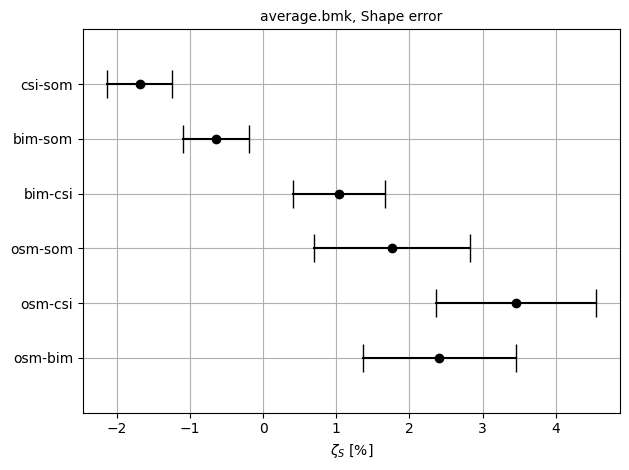

(<Figure size 640x480 with 1 Axes>, None)

In [7]:
benchmark.confint("zeta_s", show=True, paired=True, method=["osm","bim", "csi", "som"])

Confidence Intervals
Indicator: zeta_s
* osm-bim, Normality: True (Transformation: boxcox (lambda=4.150e-01)), 95.0 Confi. In.: (4.06e+00, 6.03e+00)
* osm-csi, Normality: True (Transformation: log), 95.0 Confi. In.: (1.83e+00, 3.43e+00)
* osm-som, Normality: True (Transformation: boxcox (lambda=1.921e-01)), 95.0 Confi. In.: (3.96e+00, 5.81e+00)
* bim-csi, Normality: True (Transformation: boxcox (lambda=2.448e-01)), 95.0 Confi. In.: (3.18e+00, 4.36e+00)
* bim-som, Normality: True, 95.0 Confi. In.: (-1.10e+00, -1.96e-01)
* csi-som, Normality: True (Transformation: boxcox (lambda=2.015e+00)), 95.0 Confi. In.: (4.91e+00, 5.67e+00)



/var/folders/2s/w3nw72w50v52hnm29spkngvm0000gn/T/ipykernel_28115/2290544660.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


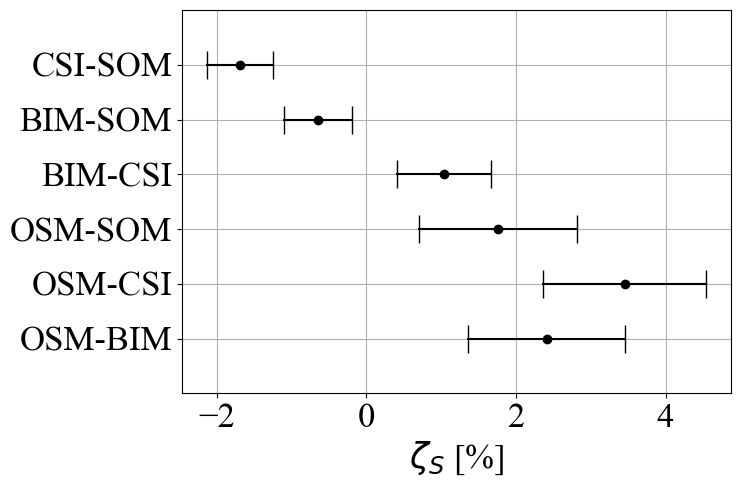

In [13]:
fig, _ = benchmark.confint("zeta_s", show=False, paired=True, method=["osm","bim", "csi", "som"])

# Increase font size to 25 and remove title
for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.set_xlabel(ax.get_xlabel(), fontsize=25)
    ax.set_ylabel(ax.get_ylabel(), fontsize=25)
    ax.set_title('')  # Remove title
    
    # Set y-axis labels to uppercase
    y_labels = [label.get_text().upper() for label in ax.get_yticklabels()]
    ax.set_yticklabels(y_labels)

fig.show()

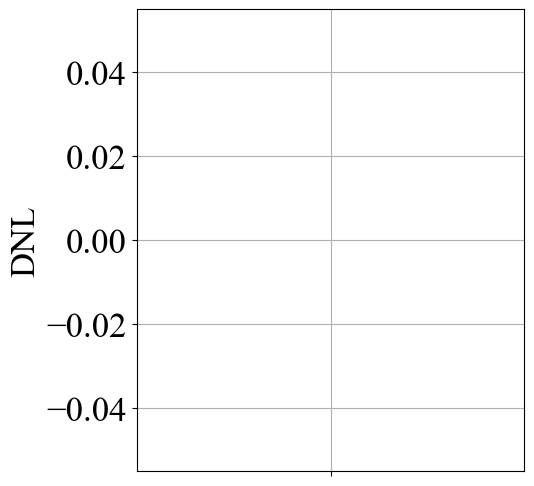

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

dnl = np.zeros(30)
for i in range(30):
    dnl[i] = benchmark.testset.test[i].dnl
plt.figure(figsize=(5, 6))
box_plot = plt.boxplot(dnl, vert=True, patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightgray')
box_plot['medians'][0].set_color('black')
plt.ylabel('DNL', fontsize=25)
# plt.title('Boxplot of DNL')
plt.tick_params(axis='both', which='major', labelsize=25)
plt.tick_params(axis='x', labelbottom=False)  # Remove x-axis labels
plt.grid(True)
plt.show()